# MSCS 634 – Project Deliverable 2  
## Regression Modeling and Performance Evaluation  
**Name**: Pawan Pandey  
**Course**: Advanced Big Data and Data Mining (MSCS-634-B01)  
**Instructor**: Satish Penmatsa  

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline
%matplotlib inline

### Load Dataset

In [7]:
# Read dataset
data = pd.read_csv("heart.csv")  # Replace with actual filename if saved

# Preview data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
# Get statistical measures of different attributes
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Preprocessing & Feature Engineering

In [9]:
# Check for missing values
print(data.isnull().sum())

# Convert categorical variables if needed
data['sex'] = data['sex'].astype('category')
data['cp'] = data['cp'].astype('category')
data['restecg'] = data['restecg'].astype('category')
data['slope'] = data['slope'].astype('category')
data['thal'] = data['thal'].astype('category')

# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Split into features and target
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Build Regression Models

#### Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

#### Ridge Regression

In [11]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#### Lasso Regression

In [12]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

### Cross-Validation

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_lr = cross_val_score(lr, X, y, cv=kf, scoring='r2')
cv_scores_ridge = cross_val_score(ridge, X, y, cv=kf, scoring='r2')
cv_scores_lasso = cross_val_score(lasso, X, y, cv=kf, scoring='r2')

### Model Evaluation Summary

In [14]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso],
    "R²": [r2_lr, r2_ridge, r2_lasso],
    "CV Mean R²": [cv_scores_lr.mean(), cv_scores_ridge.mean(), cv_scores_lasso.mean()]
})

print(results)

    Model      RMSE        R²  CV Mean R²
0  Linear  0.377366  0.430367    0.517773
1   Ridge  0.374593  0.438707    0.519397
2   Lasso  0.446029  0.204212    0.268160


### Visual Comparison

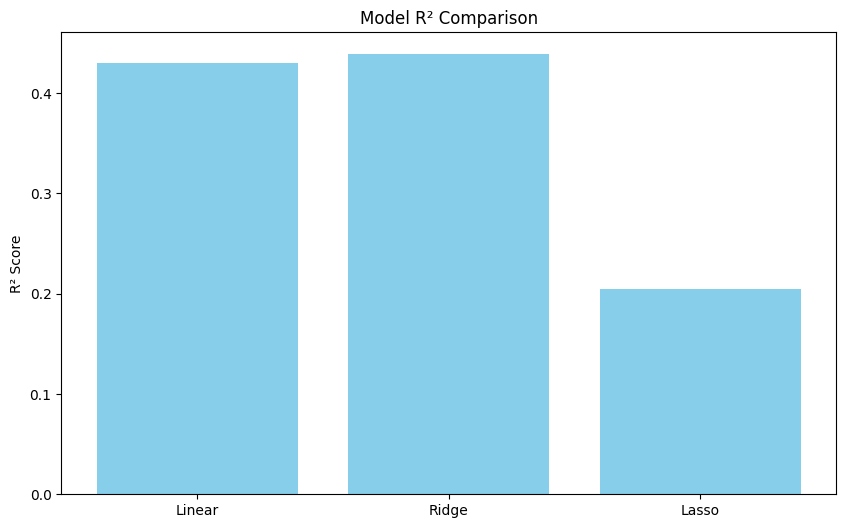

In [15]:
plt.figure(figsize=(10, 6))
x_axis = ["Linear", "Ridge", "Lasso"]
plt.bar(x_axis, results["R²"], color='skyblue')
plt.title("Model R² Comparison")
plt.ylabel("R² Score")
plt.show()